In [199]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import random
import numpy as np
import matplotlib.pyplot as plt

In [200]:
def uniformrandom(mu,sigma,n,value):
    class_name = [0] * n
    for i in range(n):
        class_name[i] = [0,random.gauss(mu,sigma),random.gauss(mu,sigma),random.gauss(mu,sigma),value]
    return class_name
def output(value,n):
    i = 0
    output = [0] * n
    while i<n:
        output[i] = value
        i = i + n
    return output

In [201]:
class0 = uniformrandom(1, 0.1,1000,0)
class1 = uniformrandom(1.5, 0.1, 1000,1)
merged_list = class0 + class1
np.random.shuffle(merged_list)

In [202]:
# mean = [0,0]
# cov = [[1,0],[0,100]]
# x,y,z = np.random.multivariate_normal(mean,cov,(3,1000))

<IPython.core.display.Javascript object>


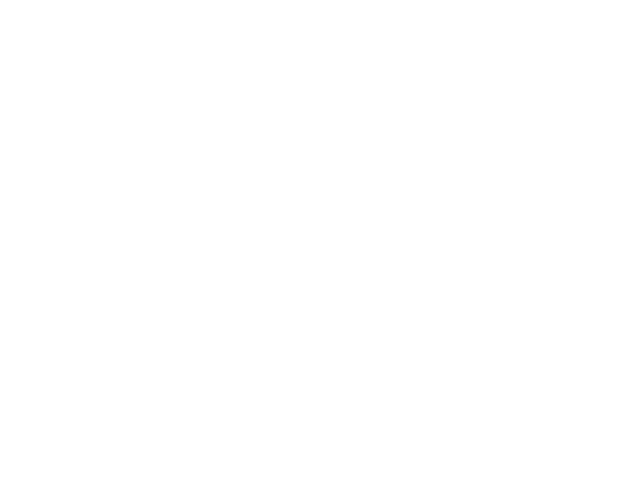

In [203]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(merged_list)):   
        ax.scatter3D(merged_list[i][1],merged_list[i][2],merged_list[i][3],c='gray',cmap="Greens")
# ax.scatter3D(x1,y1,z1,c ='blue',cmap = "Greens")

In [204]:
def predict(inputs, weights):
    activation = 0.0
    summation = 0
#     f = np.dot(inputs[:3],weights[:3])
#     print(len(weights))
    for i in range(len(weights)):
        if (i == 0):
            summation+=inputs[i]
        summation += inputs[i+1] * weights[i] ;
    if summation >= activation:
        return 1
    else:
#         print("printing 0")
        return 0

In [205]:
def train(dataset, l_rate, epochs):
    w = np.zeros(len(dataset[0])-2)
    error_rate = 0
    erEpoch = [];
    for epoch in range(epochs):
        total_error = 0.0
        for i in range(len(dataset)-401):
            p_out = predict(dataset[i],w)
            error_rate = (dataset[i][-1] - p_out)
            if(error_rate != 0):
                total_error += 1;
            for j in range(len(w)):
                if(j == 0):
                    dataset[i][j] += l_rate * error_rate;
                w[j] += (l_rate * error_rate * dataset[i][j+1]);
        erEpoch.append(total_error);
    return w,erEpoch

In [206]:
we,error=train(merged_list,0.01,100)

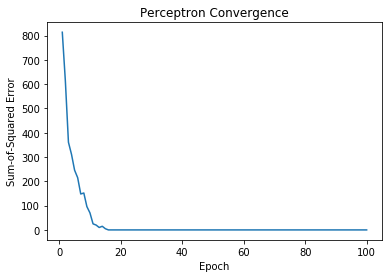

In [207]:

def plotErrorRate(error):
    epoch = np.linspace(1,len(error),len(error))

    %matplotlib inline  
    plt.plot(epoch, error)
    plt.xlabel('Epoch')
    plt.ylabel('Sum-of-Squared Error')
    plt.title('Perceptron Convergence')
plotErrorRate(error);

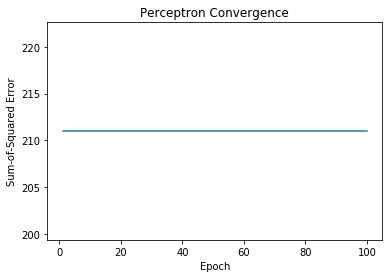

In [208]:
def validateDataSet(dataset,epochs,weights):
    error_rate = 0
    erEpoch = [];
    for epoch in range(epochs):
        total_error = 0.0
        for i in range(401,len(dataset)):
            p_out = predict(dataset[i],weights)
            error_rate = (dataset[i][-1] - p_out)
            if(error_rate != 0):
                total_error += 1;
        erEpoch.append(total_error);
    plotErrorRate(erEpoch);
    return erEpoch
validateDataSet(merged_list,100,we);
    